In [1]:
%pip install pandas numpy matplotlib plotly seaborn scikit-learn

In [2]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<Axes: >

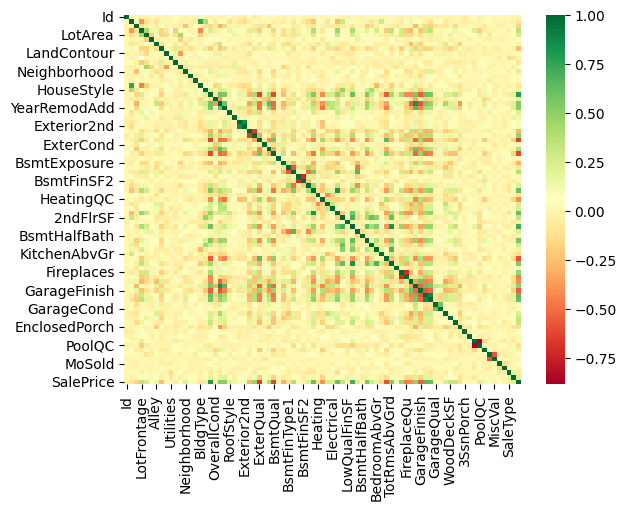

In [4]:
# Преобразуйте строковые значения в числовые
le = LabelEncoder()

for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = le.fit_transform(df[i])

df.head()

sns.heatmap(df.corr(), cmap="RdYlGn")


In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
data = pd.read_csv("train.csv")
y = data["SalePrice"]

df["SalePrice"] = y
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [7]:
df = df.dropna()
y = df["SalePrice"]
X = df.drop(['SalePrice'], axis=1)

In [8]:
# import numpy as np


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=7)

# def mse(X,y,vec):
#     p=len(y)
#     ms=(1./p)*np.sum((X.dot(vec)-y)**2) # нормализация переменных = мартрица умноженная скалярно на вектор матрицы
#     return ms
# def grad(X,y,learn,i):
#     X = np.hstack((np.ones((X.shape[0], 1)), X)) 
#     params = np.random.rand(X.shape[1]) # ввод значений весов w1,w2
#     m = X.shape[0]
    
#     cost_track = np.zeros((i, 1)) # отслеживает фун-ции
    
#     for i in range(i):
#         params = params - (2./m * learn * np.dot(X.T, (np.dot(X, params) - y)))
#         cost_track[i] = mse(X, y, params)
    
#     return cost_track, params

In [9]:
model = LinearRegression()
model.fit(X, y)

predictions = model.predict(X)

In [12]:
def compute_accuracy(y, predictions):  
    correctly_predicted = 0  
    for true_label, predicted in zip(y, predictions):  
        if true_label == predicted:  
            correctly_predicted += 1  
    accuracy_score = correctly_predicted / len(y)  
    return accuracy_score  

score = r2_score(y, predictions)  
print(score)

0.8563320801067156


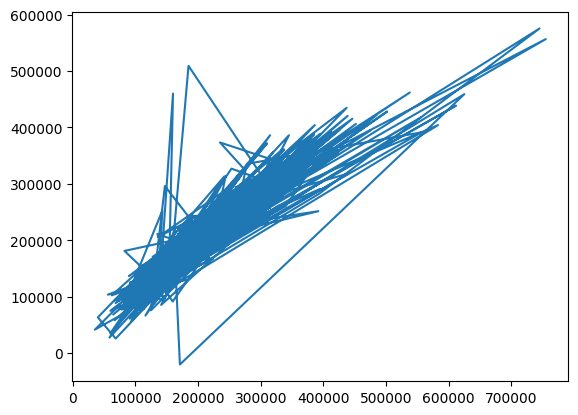

In [11]:
plt.plot(y, predictions)